# Import Data

This is the dataset link:
https://archive.ics.uci.edu/dataset/189/parkinsons+telemonitoring

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
parkinsons_telemonitoring = fetch_ucirepo(id=189)

# data (as pandas dataframes)
X = parkinsons_telemonitoring.data.features
y = parkinsons_telemonitoring.data.targets

# metadata
print(parkinsons_telemonitoring.metadata)

# variable information
print(parkinsons_telemonitoring.variables)

{'uci_id': 189, 'name': 'Parkinsons Telemonitoring', 'repository_url': 'https://archive.ics.uci.edu/dataset/189/parkinsons+telemonitoring', 'data_url': 'https://archive.ics.uci.edu/static/public/189/data.csv', 'abstract': "Oxford Parkinson's Disease Telemonitoring Dataset", 'area': 'Health and Medicine', 'tasks': ['Regression'], 'characteristics': ['Tabular'], 'num_instances': 5875, 'num_features': 19, 'feature_types': ['Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['motor_UPDRS', 'total_UPDRS'], 'index_col': ['subject#'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5ZS3N', 'creators': ['Athanasios Tsanas', 'Max Little'], 'intro_paper': {'title': "Accurate Telemonitoring of Parkinson's Disease Progression by Noninvasive Speech Tests", 'authors': 'A. Tsanas, Max A. Little, P. McSharry, L. Ramig', 'published_in': 'IEEE Transactions on Biomedical Engineering', 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data Exploration

Convert X and y into pandas DataFrame and combine them into a single DataFrame df.

In [ ]:
pd.DataFrame(X)
pd.DataFrame(y)
df = X.join(y)

The first few rows of the dataset:

In [ ]:
df.head()

age  test_time  Jitter(%)  Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  \
0   72     5.6431    0.00662     0.000034     0.00401      0.00317   
1   72    12.6660    0.00300     0.000017     0.00132      0.00150   
2   72    19.6810    0.00481     0.000025     0.00205      0.00208   
3   72    25.6470    0.00528     0.000027     0.00191      0.00264   
4   72    33.6420    0.00335     0.000020     0.00093      0.00130   

   Jitter:DDP  Shimmer  Shimmer(dB)  Shimmer:APQ3  ...  Shimmer:APQ11  \
0     0.01204  0.02565        0.230       0.01438  ...        0.01662   
1     0.00395  0.02024        0.179       0.00994  ...        0.01689   
2     0.00616  0.01675        0.181       0.00734  ...        0.01458   
3     0.00573  0.02309        0.327       0.01106  ...        0.01963   
4     0.00278  0.01703        0.176       0.00679  ...        0.01819   

   Shimmer:DDA       NHR     HNR     RPDE      DFA      PPE  sex  motor_UPDRS  \
0      0.04314  0.014290  21.640  0.41888  0.54842  0.16006    0       28.199   
1      0.02982  0.011112  27.183  0.43493  0.56477  0.10810    0       28.447   
2      0.02202  0.020220  23.047  0.46222  0.54405  0.21014    0       28.695   
3      0.03317  0.027837  24.445  0.48730  0.57794  0.33277    0       28.905   
4      0.02036  0.011625  26.126  0.47188  0.56122  0.19361    0       29.187   

   total_UPDRS  
0       34.398  
1       34.894  
2       35.389  
3       35.810  
4       36.375  

[5 rows x 21 columns]

Statistical summary of the numerical features in the dataset:

In [ ]:
df.describe()

age    test_time    Jitter(%)  Jitter(Abs)   Jitter:RAP  \
count  5875.000000  5875.000000  5875.000000  5875.000000  5875.000000   
mean     64.804936    92.863722     0.006154     0.000044     0.002987   
std       8.821524    53.445602     0.005624     0.000036     0.003124   
min      36.000000    -4.262500     0.000830     0.000002     0.000330   
25%      58.000000    46.847500     0.003580     0.000022     0.001580   
50%      65.000000    91.523000     0.004900     0.000034     0.002250   
75%      72.000000   138.445000     0.006800     0.000053     0.003290   
max      85.000000   215.490000     0.099990     0.000446     0.057540   

       Jitter:PPQ5   Jitter:DDP      Shimmer  Shimmer(dB)  Shimmer:APQ3  ...  \
count  5875.000000  5875.000000  5875.000000  5875.000000   5875.000000  ...   
mean      0.003277     0.008962     0.034035     0.310960      0.017156  ...   
std       0.003732     0.009371     0.025835     0.230254      0.013237  ...   
min       0.000430     0.000980     0.003060     0.026000      0.001610  ...   
25%       0.001820     0.004730     0.019120     0.175000      0.009280  ...   
50%       0.002490     0.006750     0.027510     0.253000      0.013700  ...   
75%       0.003460     0.009870     0.039750     0.365000      0.020575  ...   
max       0.069560     0.172630     0.268630     2.107000      0.162670  ...   

       Shimmer:APQ11  Shimmer:DDA          NHR          HNR         RPDE  \
count    5875.000000  5875.000000  5875.000000  5875.000000  5875.000000   
mean        0.027481     0.051467     0.032120    21.679495     0.541473   
std         0.019986     0.039711     0.059692     4.291096     0.100986   
min         0.002490     0.004840     0.000286     1.659000     0.151020   
25%         0.015665     0.027830     0.010955    19.406000     0.469785   
50%         0.022710     0.041110     0.018448    21.920000     0.542250   
75%         0.032715     0.061735     0.031463    24.444000     0.614045   
max         0.275460     0.488020     0.748260    37.875000     0.966080   

               DFA          PPE          sex  motor_UPDRS  total_UPDRS  
count  5875.000000  5875.000000  5875.000000  5875.000000  5875.000000  
mean      0.653240     0.219589     0.317787    21.296229    29.018942  
std       0.070902     0.091498     0.465656     8.129282    10.700283  
min       0.514040     0.021983     0.000000     5.037700     7.000000  
25%       0.596180     0.156340     0.000000    15.000000    21.371000  
50%       0.643600     0.205500     0.000000    20.871000    27.576000  
75%       0.711335     0.264490     1.000000    27.596500    36.399000  
max       0.865600     0.731730     1.000000    39.511000    54.992000  

[8 rows x 21 columns]

In [ ]:
print("Number of observations:", df.shape[0])

Number of observations: 5875


Creates a histogram to show how data in y is distributed.

<Axes: ylabel='Count'>

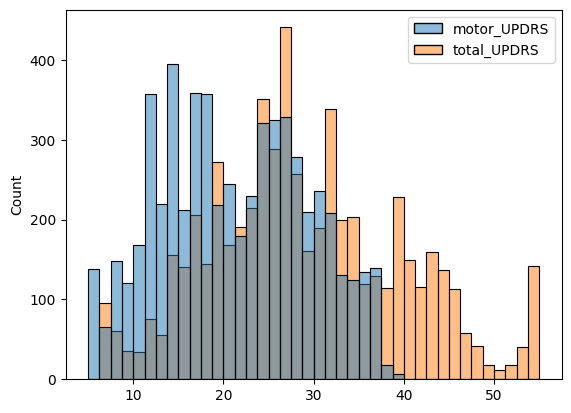

In [ ]:
sns.histplot(y)

Create a grid of plots to examine how pairs of data points in df relate to each other.

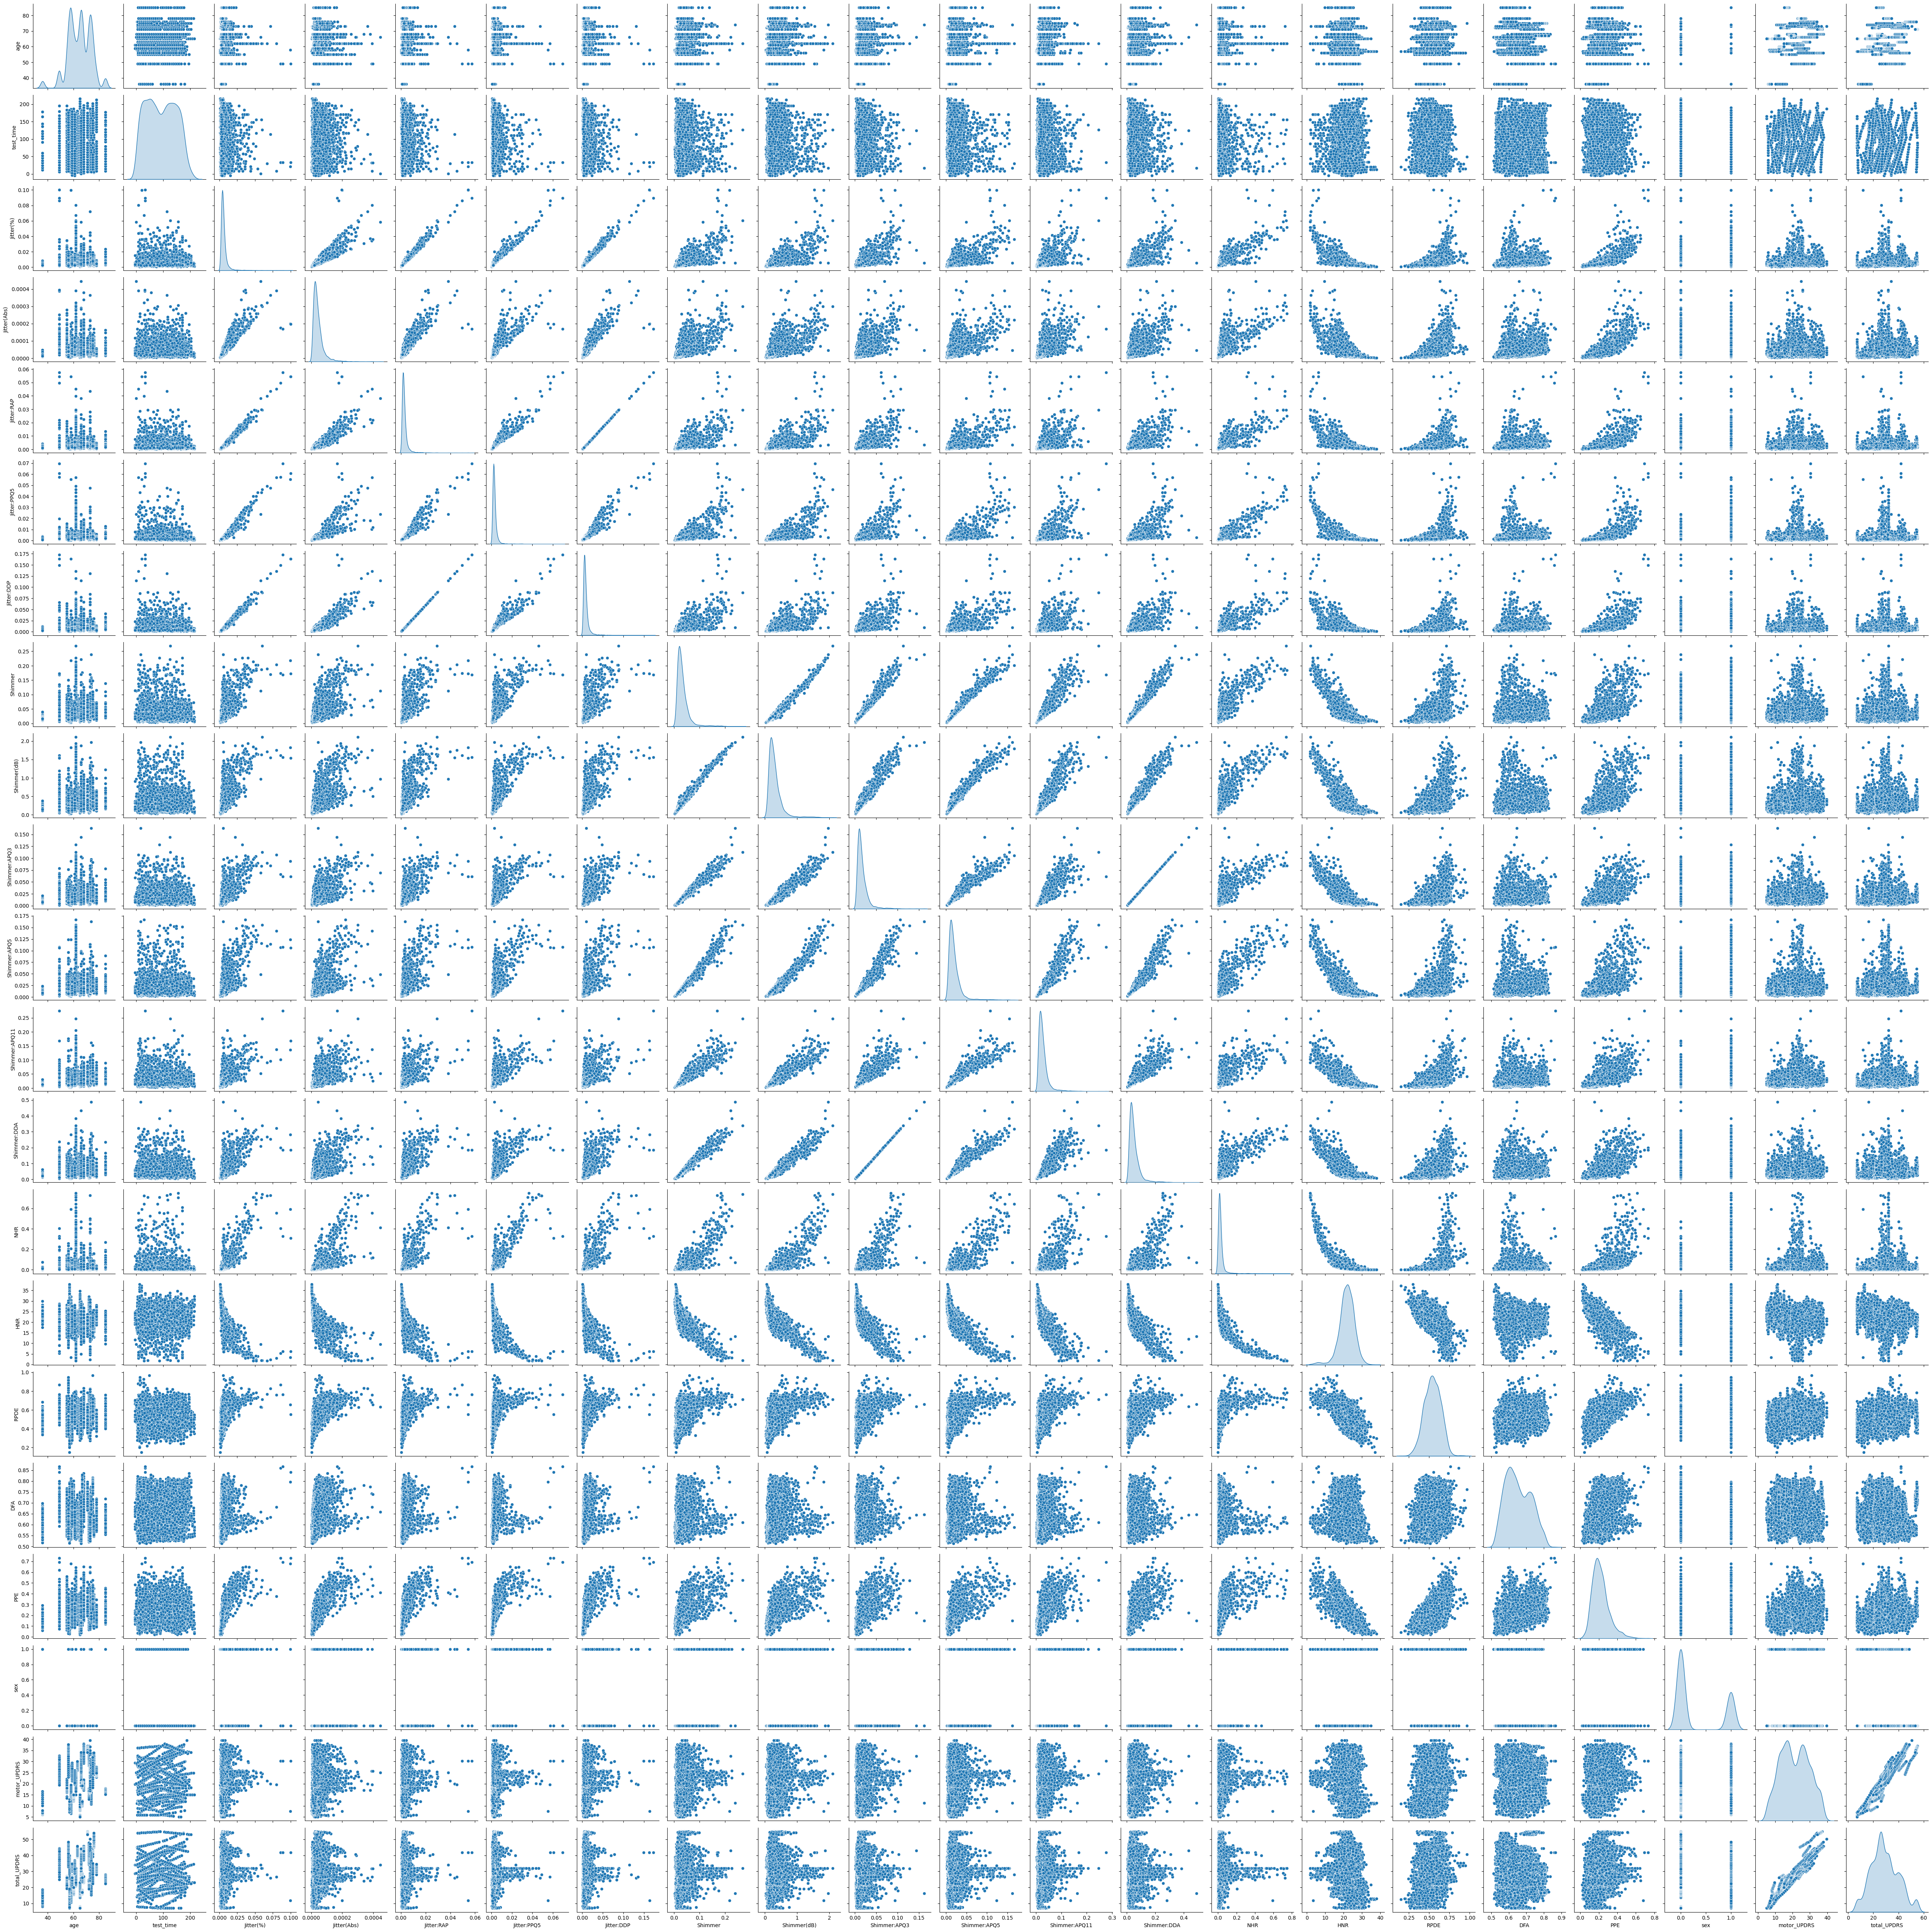

In [ ]:
sns.pairplot(df, diag_kind='kde')

Display the relationship strengths (correlation) between the columns in df.

In [ ]:
corr = df.corr()
corr

age  test_time  Jitter(%)  Jitter(Abs)  Jitter:RAP  \
age            1.000000   0.019884   0.023071     0.035685    0.010255   
test_time      0.019884   1.000000  -0.022837    -0.011349   -0.028888   
Jitter(%)      0.023071  -0.022837   1.000000     0.865574    0.984181   
Jitter(Abs)    0.035685  -0.011349   0.865574     1.000000    0.844622   
Jitter:RAP     0.010255  -0.028888   0.984181     0.844622    1.000000   
Jitter:PPQ5    0.013199  -0.023290   0.968214     0.790534    0.947196   
Jitter:DDP     0.010258  -0.028876   0.984184     0.844626    1.000000   
Shimmer        0.101554  -0.033870   0.709791     0.649041    0.681729   
Shimmer(dB)    0.111130  -0.030962   0.716704     0.655866    0.685551   
Shimmer:APQ3   0.098912  -0.029020   0.664149     0.623825    0.650226   
Shimmer:APQ5   0.089983  -0.036504   0.694002     0.621397    0.659831   
Shimmer:APQ11  0.135238  -0.039110   0.645965     0.589992    0.603082   
Shimmer:DDA    0.098913  -0.029017   0.664147     0.623823    0.650225   
NHR            0.007093  -0.026357   0.825294     0.699954    0.792373   
HNR           -0.104842   0.036545  -0.675188    -0.706420   -0.641473   
RPDE           0.090208  -0.038887   0.427128     0.547097    0.382891   
DFA           -0.092870   0.019261   0.226550     0.352264    0.214881   
PPE            0.120790  -0.000563   0.721849     0.787848    0.670652   
sex           -0.041602  -0.009805   0.051422    -0.154661    0.076718   
motor_UPDRS    0.273665   0.067918   0.084816     0.050899    0.072684   
total_UPDRS    0.310290   0.075263   0.074247     0.066926    0.064015   

               Jitter:PPQ5  Jitter:DDP   Shimmer  Shimmer(dB)  Shimmer:APQ3  \
age               0.013199    0.010258  0.101554     0.111130      0.098912   
test_time        -0.023290   -0.028876 -0.033870    -0.030962     -0.029020   
Jitter(%)         0.968214    0.984184  0.709791     0.716704      0.664149   
Jitter(Abs)       0.790534    0.844626  0.649041     0.655866      0.623825   
Jitter:RAP        0.947196    1.000000  0.681729     0.685551      0.650226   
Jitter:PPQ5       1.000000    0.947203  0.732747     0.734591      0.676711   
Jitter:DDP        0.947203    1.000000  0.681734     0.685556      0.650228   
Shimmer           0.732747    0.681734  1.000000     0.992334      0.979828   
Shimmer(dB)       0.734591    0.685556  0.992334     1.000000      0.968015   
Shimmer:APQ3      0.676711    0.650228  0.979828     0.968015      1.000000   
Shimmer:APQ5      0.734021    0.659833  0.984904     0.976373      0.962723   
Shimmer:APQ11     0.668413    0.603090  0.935457     0.936338      0.885695   
Shimmer:DDA       0.676710    0.650227  0.979827     0.968014      1.000000   
NHR               0.864864    0.792377  0.795158     0.798077      0.732736   
HNR              -0.662409   -0.641482 -0.801416    -0.802496     -0.780697   
RPDE              0.381503    0.382886  0.468235     0.472409      0.436878   
DFA               0.175359    0.214893  0.132540     0.126111      0.130735   
PPE               0.663491    0.670660  0.615709     0.635163      0.576704   
sex               0.087995    0.076703  0.058736     0.056481      0.044937   
motor_UPDRS       0.076291    0.072698  0.102349     0.110076      0.084261   
total_UPDRS       0.063352    0.064027  0.092141     0.098790      0.079363   

               ...  Shimmer:APQ11  Shimmer:DDA       NHR       HNR      RPDE  \
age            ...       0.135238     0.098913  0.007093 -0.104842  0.090208   
test_time      ...      -0.039110    -0.029017 -0.026357  0.036545 -0.038887   
Jitter(%)      ...       0.645965     0.664147  0.825294 -0.675188  0.427128   
Jitter(Abs)    ...       0.589992     0.623823  0.699954 -0.706420  0.547097   
Jitter:RAP     ...       0.603082     0.650225  0.792373 -0.641473  0.382891   
Jitter:PPQ5    ...       0.668413     0.676710  0.864864 -0.662409  0.381503   
Jitter:DDP     ...       0.603090     0.650227  0.792377 -0.641482  0.382886   
Shimmer     

Plots a heatmap to visually represent the relationships from the correlation table.

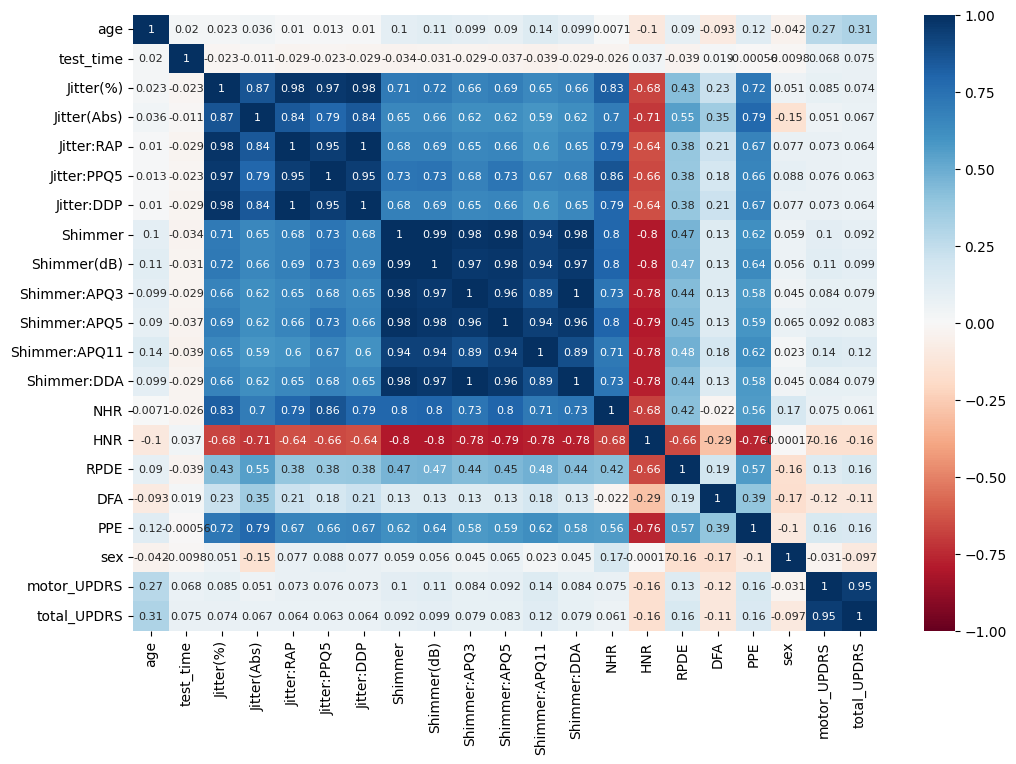

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True, cmap='RdBu', annot_kws={'size': 8})
plt.show()

The heatmap reveals high internal correlations within the 'Jitter' and 'Shimmer' feature sets, indicating redundancy. To streamline the dataset and enhance model efficiency, we select representative features from each group—'Jitter(%)' from the Jitter set and 'Shimmer' from the Shimmer set—while dropping other highly correlated features. This approach reduces multicollinearity and focuses on key indicators of voice frequency and amplitude stability, ensuring that essential information is retained without unnecessary complexity.

In [ ]:
features_to_drop = ['Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
                    'Shimmer:DDA','Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11']
df_reduced = df.drop(columns=features_to_drop)
print(df_reduced.columns)

Index(['age', 'test_time', 'Jitter(%)', 'Shimmer', 'NHR', 'HNR', 'RPDE', 'DFA',
       'PPE', 'sex', 'motor_UPDRS', 'total_UPDRS'],
      dtype='object')


Redraw the heatmap.

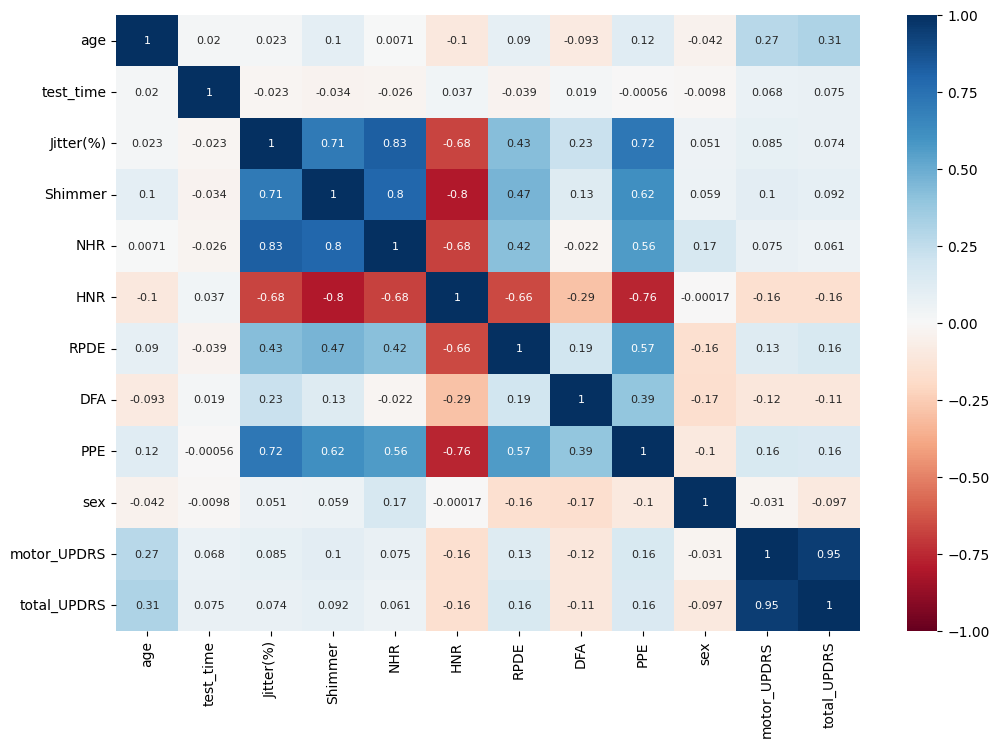

In [ ]:
corr_reduced = df_reduced.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_reduced, vmin=-1, vmax=1, center=0, annot=True, cmap='RdBu', annot_kws={'size': 8})
plt.show()